In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly as ply

In [2]:
read_data = pd.read_csv('./order_items.csv')
read_data.head()

id  order_id  user_id  product_id  inventory_item_id    status  \
0   16000     10975     8831       13606              43216  Complete   
1   58903     40591    32637       13606             159361  Complete   
2  160715    110826    88857       13606             434265  Returned   
3   40331     27796    22443       28951             109154   Shipped   
4   83959     57928    46609       28951             227036   Shipped   

                created_at               shipped_at             delivered_at  \
0  2020-09-14 17:59:04 UTC  2020-09-16 12:05:00 UTC  2020-09-17 21:47:00 UTC   
1  2023-07-26 06:59:00 UTC  2023-07-28 07:38:00 UTC  2023-08-01 06:03:00 UTC   
2  2023-07-11 05:19:49 UTC  2023-07-12 13:45:00 UTC  2023-07-12 21:41:00 UTC   
3  2023-06-01 17:44:45 UTC  2023-06-04 17:26:00 UTC                      NaN   
4  2023-06-28 05:57:34 UTC  2023-06-29 16:56:00 UTC                      NaN   

               returned_at  sale_price  
0                      NaN         2.5  
1                      NaN         2.5  
2  2023-07-13 21:15:00 UTC         2.5  
3                      NaN         3.0  
4                      NaN         3.0

In [3]:
read_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180976 entries, 0 to 180975
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 180976 non-null  int64  
 1   order_id           180976 non-null  int64  
 2   user_id            180976 non-null  int64  
 3   product_id         180976 non-null  int64  
 4   inventory_item_id  180976 non-null  int64  
 5   status             180976 non-null  object 
 6   created_at         180976 non-null  object 
 7   shipped_at         118302 non-null  object 
 8   delivered_at       63484 non-null   object 
 9   returned_at        18117 non-null   object 
 10  sale_price         180976 non-null  float64
dtypes: float64(1), int64(5), object(5)
memory usage: 15.2+ MB


In [4]:
from dateutil import parser

In [5]:
read_data['created_at'] = read_data['created_at'].map(parser.parse)
read_data.head()

id  order_id  user_id  product_id  inventory_item_id    status  \
0   16000     10975     8831       13606              43216  Complete   
1   58903     40591    32637       13606             159361  Complete   
2  160715    110826    88857       13606             434265  Returned   
3   40331     27796    22443       28951             109154   Shipped   
4   83959     57928    46609       28951             227036   Shipped   

                 created_at               shipped_at             delivered_at  \
0 2020-09-14 17:59:04+00:00  2020-09-16 12:05:00 UTC  2020-09-17 21:47:00 UTC   
1 2023-07-26 06:59:00+00:00  2023-07-28 07:38:00 UTC  2023-08-01 06:03:00 UTC   
2 2023-07-11 05:19:49+00:00  2023-07-12 13:45:00 UTC  2023-07-12 21:41:00 UTC   
3 2023-06-01 17:44:45+00:00  2023-06-04 17:26:00 UTC                      NaN   
4 2023-06-28 05:57:34+00:00  2023-06-29 16:56:00 UTC                      NaN   

               returned_at  sale_price  
0                      NaN         2.5  
1                      NaN         2.5  
2  2023-07-13 21:15:00 UTC         2.5  
3                      NaN         3.0  
4                      NaN         3.0

In [6]:
read_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180976 entries, 0 to 180975
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype                  
---  ------             --------------   -----                  
 0   id                 180976 non-null  int64                  
 1   order_id           180976 non-null  int64                  
 2   user_id            180976 non-null  int64                  
 3   product_id         180976 non-null  int64                  
 4   inventory_item_id  180976 non-null  int64                  
 5   status             180976 non-null  object                 
 6   created_at         180976 non-null  datetime64[ns, tzutc()]
 7   shipped_at         118302 non-null  object                 
 8   delivered_at       63484 non-null   object                 
 9   returned_at        18117 non-null   object                 
 10  sale_price         180976 non-null  float64                
dtypes: datetime64[ns, tzutc()](1), float64(

## Shipped_at, delivered_at, and returned_at in datetime format

In [7]:
def convert(x):
    if pd.notna(x):
        return parser.parse(x)
    else:
        None
        
read_data['shipped_at'] = read_data['shipped_at'].apply(convert)
read_data['delivered_at'] = read_data['delivered_at'].apply(convert)
read_data['returned_at'] = read_data['returned_at'].apply(convert)

read_data.head()

id  order_id  user_id  product_id  inventory_item_id    status  \
0   16000     10975     8831       13606              43216  Complete   
1   58903     40591    32637       13606             159361  Complete   
2  160715    110826    88857       13606             434265  Returned   
3   40331     27796    22443       28951             109154   Shipped   
4   83959     57928    46609       28951             227036   Shipped   

                 created_at                shipped_at  \
0 2020-09-14 17:59:04+00:00 2020-09-16 12:05:00+00:00   
1 2023-07-26 06:59:00+00:00 2023-07-28 07:38:00+00:00   
2 2023-07-11 05:19:49+00:00 2023-07-12 13:45:00+00:00   
3 2023-06-01 17:44:45+00:00 2023-06-04 17:26:00+00:00   
4 2023-06-28 05:57:34+00:00 2023-06-29 16:56:00+00:00   

               delivered_at               returned_at  sale_price  
0 2020-09-17 21:47:00+00:00                       NaT         2.5  
1 2023-08-01 06:03:00+00:00                       NaT         2.5  
2 2023-07-12 21:41:00+00:00 2023-07-13 21:15:00+00:00         2.5  
3                       NaT                       NaT         3.0  
4                       NaT                       NaT         3.0

In [30]:
read_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180976 entries, 0 to 180975
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype                  
---  ------             --------------   -----                  
 0   id                 180976 non-null  int64                  
 1   order_id           180976 non-null  int64                  
 2   user_id            180976 non-null  int64                  
 3   product_id         180976 non-null  int64                  
 4   inventory_item_id  180976 non-null  int64                  
 5   status             180976 non-null  object                 
 6   created_at         180976 non-null  datetime64[ns, tzutc()]
 7   shipped_at         118302 non-null  datetime64[ns, tzutc()]
 8   delivered_at       63484 non-null   datetime64[ns, tzutc()]
 9   returned_at        18117 non-null   datetime64[ns, tzutc()]
 10  sale_price         180976 non-null  float64                
 11  hour               180976 non-null  int

## Distribution of order status

In [33]:
read_data['status'].value_counts()

status
Shipped       54818
Complete      45367
Processing    35727
Cancelled     26947
Returned      18117
Name: count, dtype: int64

<Axes: title={'center': 'Status Condition'}, ylabel='count'>

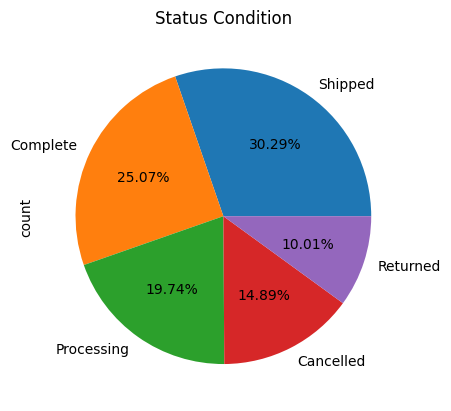

In [8]:
read_data['status'].value_counts().plot.pie(title = 'Status Condition', autopct = '%.2f%%')

## Hourly orders

In [9]:
read_data['created_at'][0].hour

17

In [10]:
read_data['hour'] = read_data['created_at'].map(lambda x: x.hour)
read_data.head()

id  order_id  user_id  product_id  inventory_item_id    status  \
0   16000     10975     8831       13606              43216  Complete   
1   58903     40591    32637       13606             159361  Complete   
2  160715    110826    88857       13606             434265  Returned   
3   40331     27796    22443       28951             109154   Shipped   
4   83959     57928    46609       28951             227036   Shipped   

                 created_at                shipped_at  \
0 2020-09-14 17:59:04+00:00 2020-09-16 12:05:00+00:00   
1 2023-07-26 06:59:00+00:00 2023-07-28 07:38:00+00:00   
2 2023-07-11 05:19:49+00:00 2023-07-12 13:45:00+00:00   
3 2023-06-01 17:44:45+00:00 2023-06-04 17:26:00+00:00   
4 2023-06-28 05:57:34+00:00 2023-06-29 16:56:00+00:00   

               delivered_at               returned_at  sale_price  hour  
0 2020-09-17 21:47:00+00:00                       NaT         2.5    17  
1 2023-08-01 06:03:00+00:00                       NaT         2.5     6  
2 2023-07-12 21:41:00+00:00 2023-07-13 21:15:00+00:00         2.5     5  
3                       NaT                       NaT         3.0    17  
4                       NaT                       NaT         3.0     5

## Hour component from created_at

In [11]:
pd.DataFrame(read_data['hour']).head()

hour
0    17
1     6
2     5
3    17
4     5

In [12]:
groupe = read_data.groupby(['hour'])['id'].count()
groupe

hour
0     9482
1     9220
2     9352
3     9617
4     9631
5     9705
6     9577
7     9628
8     9404
9     9581
10    9402
11    9445
12    9350
13    9648
14    9482
15    8794
16    6574
17    4004
18    1647
19      51
20     756
21    3209
22    5462
23    7955
Name: id, dtype: int64

<Axes: title={'center': 'Order Hours'}, xlabel='hour', ylabel='count'>

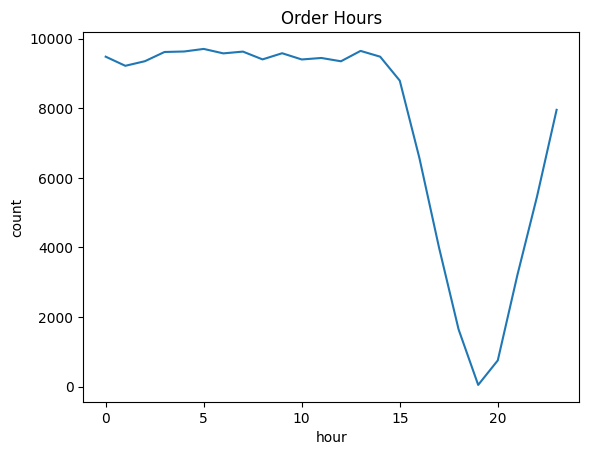

In [13]:
groupe.plot.line(title='Order Hours', xlabel='hour', ylabel='count')

<Axes: title={'center': 'Order Hours'}, xlabel='hour', ylabel='count'>

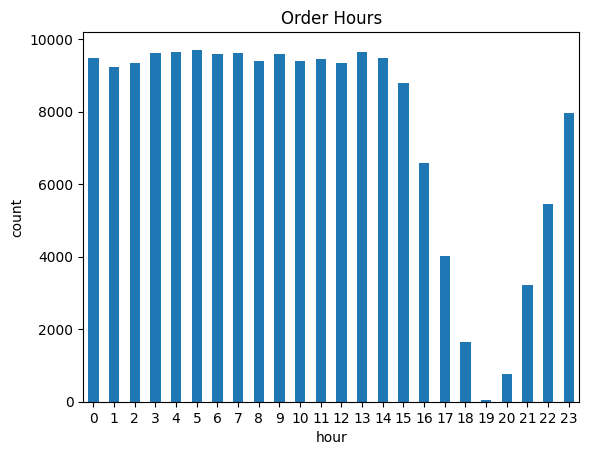

In [14]:
groupe.plot.bar(title = 'Order Hours', xlabel='hour',ylabel='count', rot=0)

<Axes: title={'center': 'Order Hours'}, xlabel='Count', ylabel='Hour'>

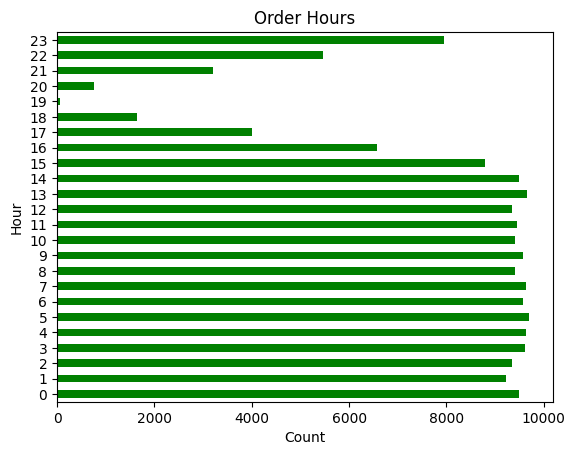

In [15]:
groupe.plot.barh(title = 'Order Hours',xlabel='Count',ylabel='Hour',color='green')

## Order hours bar chart using matplotlib and pyplot

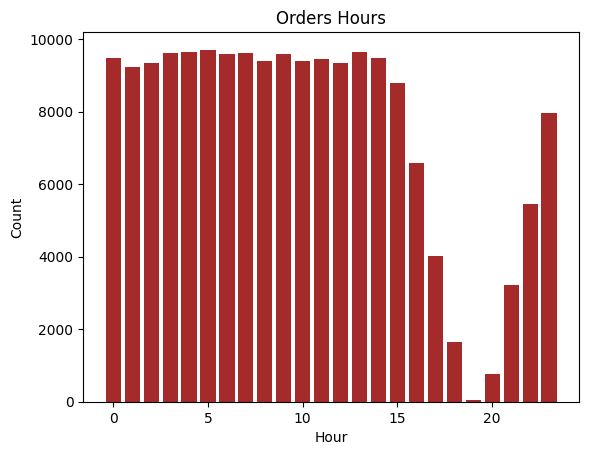

In [16]:
groupe = read_data.groupby(['hour'])['id'].count().to_dict()
key_hour = list(groupe.keys())
key_values = list(groupe.values())

plt.bar(key_hour, key_values, color='brown')
plt.title('Orders Hours')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

In [17]:
fig = ply.graph_objs.Figure(data=ply.graph_objs.Bar(x = key_hour, y = key_values))
fig.update_layout(title = 'Order hour', xaxis_title = 'Hour', yaxis_title = 'Count')
fig.show()

## Top 3 Order Request Consumer in Latest Year

In [18]:
read_data.head()

id  order_id  user_id  product_id  inventory_item_id    status  \
0   16000     10975     8831       13606              43216  Complete   
1   58903     40591    32637       13606             159361  Complete   
2  160715    110826    88857       13606             434265  Returned   
3   40331     27796    22443       28951             109154   Shipped   
4   83959     57928    46609       28951             227036   Shipped   

                 created_at                shipped_at  \
0 2020-09-14 17:59:04+00:00 2020-09-16 12:05:00+00:00   
1 2023-07-26 06:59:00+00:00 2023-07-28 07:38:00+00:00   
2 2023-07-11 05:19:49+00:00 2023-07-12 13:45:00+00:00   
3 2023-06-01 17:44:45+00:00 2023-06-04 17:26:00+00:00   
4 2023-06-28 05:57:34+00:00 2023-06-29 16:56:00+00:00   

               delivered_at               returned_at  sale_price  hour  
0 2020-09-17 21:47:00+00:00                       NaT         2.5    17  
1 2023-08-01 06:03:00+00:00                       NaT         2.5     6  
2 2023-07-12 21:41:00+00:00 2023-07-13 21:15:00+00:00         2.5     5  
3                       NaT                       NaT         3.0    17  
4                       NaT                       NaT         3.0     5

In [19]:
read_data['year'] = read_data['created_at'].map(lambda x: x.year)
read_data.year.min(),read_data.year.max()

(2019, 2023)

In [20]:
latest_data = read_data[read_data['year'] == read_data.year.max()].copy()
latest_data.head()

id  order_id  user_id  product_id  inventory_item_id    status  \
1   58903     40591    32637       13606             159361  Complete   
2  160715    110826    88857       13606             434265  Returned   
3   40331     27796    22443       28951             109154   Shipped   
4   83959     57928    46609       28951             227036   Shipped   
6  169379    116754    93660       28951             457617   Shipped   

                 created_at                shipped_at  \
1 2023-07-26 06:59:00+00:00 2023-07-28 07:38:00+00:00   
2 2023-07-11 05:19:49+00:00 2023-07-12 13:45:00+00:00   
3 2023-06-01 17:44:45+00:00 2023-06-04 17:26:00+00:00   
4 2023-06-28 05:57:34+00:00 2023-06-29 16:56:00+00:00   
6 2023-06-22 00:03:48+00:00 2023-06-22 02:44:00+00:00   

               delivered_at               returned_at  sale_price  hour  year  
1 2023-08-01 06:03:00+00:00                       NaT         2.5     6  2023  
2 2023-07-12 21:41:00+00:00 2023-07-13 21:15:00+00:00         2.5     5  2023  
3                       NaT                       NaT         3.0    17  2023  
4                       NaT                       NaT         3.0     5  2023  
6                       NaT                       NaT         3.0     0  2023

In [21]:
latest_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76333 entries, 1 to 180975
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype                  
---  ------             --------------  -----                  
 0   id                 76333 non-null  int64                  
 1   order_id           76333 non-null  int64                  
 2   user_id            76333 non-null  int64                  
 3   product_id         76333 non-null  int64                  
 4   inventory_item_id  76333 non-null  int64                  
 5   status             76333 non-null  object                 
 6   created_at         76333 non-null  datetime64[ns, tzutc()]
 7   shipped_at         49824 non-null  datetime64[ns, tzutc()]
 8   delivered_at       26809 non-null  datetime64[ns, tzutc()]
 9   returned_at        7718 non-null   datetime64[ns, tzutc()]
 10  sale_price         76333 non-null  float64                
 11  hour               76333 non-null  int64                  

In [22]:
latest_data.created_at.max(),latest_data.created_at.min()

(Timestamp('2023-08-22 19:16:34.387537+0000', tz='tzutc()'),
 Timestamp('2023-01-01 00:05:32+0000', tz='tzutc()'))

In [23]:
latest_data['month'] = latest_data['created_at'].map(lambda x: x.month)
latest_data.head()

id  order_id  user_id  product_id  inventory_item_id    status  \
1   58903     40591    32637       13606             159361  Complete   
2  160715    110826    88857       13606             434265  Returned   
3   40331     27796    22443       28951             109154   Shipped   
4   83959     57928    46609       28951             227036   Shipped   
6  169379    116754    93660       28951             457617   Shipped   

                 created_at                shipped_at  \
1 2023-07-26 06:59:00+00:00 2023-07-28 07:38:00+00:00   
2 2023-07-11 05:19:49+00:00 2023-07-12 13:45:00+00:00   
3 2023-06-01 17:44:45+00:00 2023-06-04 17:26:00+00:00   
4 2023-06-28 05:57:34+00:00 2023-06-29 16:56:00+00:00   
6 2023-06-22 00:03:48+00:00 2023-06-22 02:44:00+00:00   

               delivered_at               returned_at  sale_price  hour  year  \
1 2023-08-01 06:03:00+00:00                       NaT         2.5     6  2023   
2 2023-07-12 21:41:00+00:00 2023-07-13 21:15:00+00:00         2.5     5  2023   
3                       NaT                       NaT         3.0    17  2023   
4                       NaT                       NaT         3.0     5  2023   
6                       NaT                       NaT         3.0     0  2023   

   month  
1      7  
2      7  
3      6  
4      6  
6      6

In [24]:
grouped_data = latest_data.groupby(
    ['month','user_id'])['id'].count().reset_index(
        name = 'count').sort_values(by=['month','count'], ascending = False).copy()
grouped_data.head()

month  user_id  count
43207      8    26771     12
45517      8    56439     11
41088      8      207     10
41155      8      977     10
41981      8    11134     10

In [25]:
grouped_data['ranking'] = grouped_data.groupby(by=['month'])['count'].rank(method = 'first', ascending = False)
grouped_data.head()

month  user_id  count  ranking
43207      8    26771     12      1.0
45517      8    56439     11      2.0
41088      8      207     10      3.0
41155      8      977     10      4.0
41981      8    11134     10      5.0

In [26]:
top_3 = grouped_data.query("ranking <= 3").sort_values(['month','ranking'], ascending=[False,True]).copy()
top_3['ranking'] = top_3['ranking'].map(int)

In [27]:
import plotly.express as px
fig = px.bar(top_3[['month','count','ranking','user_id']], x="month", y="count",
             color='ranking',
             hover_data=['user_id'],
             barmode='group',
             color_continuous_scale='aggrnyl',
             title='Top 3 monthly active customer in the latest year (2023)',
             height=400)
fig.show()

## Distribution of Sale Prices

<Axes: xlabel='name', ylabel='count'>

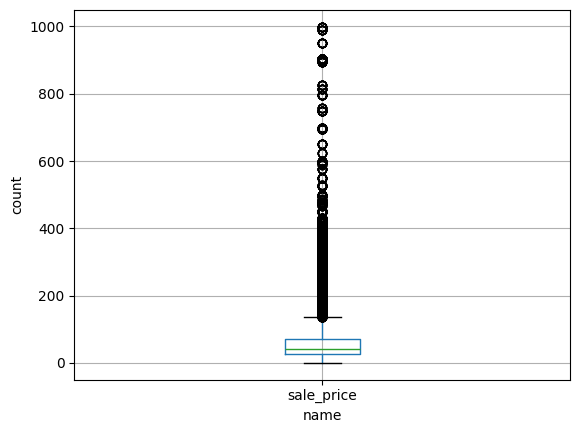

In [28]:
read_data.boxplot(column=['sale_price'], xlabel = 'name', ylabel = 'count')

In [29]:
fig = px.box(read_data, x ='year' , y="sale_price", title='Sale Price Distribution')
fig.show()